In [8]:
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import utils

Spearman Correlation
1. read adj from five PPIs
2. read KCGs from label
3. read predictions from results
4. count cancer gene interactions

In [10]:
adj = None
for ppi in ['CPDB', 'IRef', 'Multinet', 'PCNet', 'STRING']:
    ppi_dir = f"data/{ppi}/{ppi}_matrix.csv"
    print(f"Loading PPI matrix from {ppi_dir} ......")
    adj = pd.read_csv(ppi_dir, sep="\t", index_col=0) if adj is None else adj + pd.read_csv(ppi_dir, sep="\t", index_col=0)
adj[adj != 0] = 1

Loading PPI matrix from data/CPDB/CPDB_matrix.csv ......
Loading PPI matrix from data/IRef/IRef_matrix.csv ......
Loading PPI matrix from data/Multinet/Multinet_matrix.csv ......
Loading PPI matrix from data/PCNet/PCNet_matrix.csv ......
Loading PPI matrix from data/STRING/STRING_matrix.csv ......


In [11]:
DATA_DIR = "data/Breast_Cancer_Matrix"
# DATA_DIR = "data/Leukemia_Matrix"
# DATA_DIR = "data/Lung_Cancer_Matrix"
CELL_LINE = utils.get_cell_line(DATA_DIR)
KCGs = pd.read_csv(f'label_collect/{CELL_LINE}/positive/NCG.txt', header=None).iloc[:, 0].values
print(KCGs)

['TET2' 'TBL1XR1' 'TBX3' 'STK11' 'SPEN' 'STAG2' 'SMAD2' 'SMAD4' 'SMARCA4'
 'SMARCD1' 'SEPT9' 'SETD2' 'RUNX1' 'RET' 'RHOA' 'RB1' 'PREX2' 'PTEN'
 'PTPRD' 'PMS2' 'NOTCH1' 'NOTCH2' 'PDGFRA' 'PHF6' 'PIK3CA' 'PBRM1' 'PALB2'
 'NTRK3' 'ZMYM3' 'NCOR1' 'NF1' 'NF2' 'MYB' 'MDM2' 'MEN1' 'MLH1' 'AFDN'
 'MAP3K13' 'MAP2K4' 'KMT2D' 'KRAS' 'KDM6A' 'KMT2A' 'KMT2C' 'IRS4' 'HRAS'
 'HIST1H3B' 'GNAS' 'FOXA1' 'FOXO3' 'FOXP1' 'ERCC4' 'ESR1' 'FGFR2' 'FBXW7'
 'EXT2' 'CTCF' 'CUX1' 'DNMT3A' 'ECT2L' 'EGFR' 'CREBBP' 'CHEK2' 'TP53'
 'CDH1' 'CDK6' 'CDKN1B' 'CDKN2A' 'CBLB' 'CCND1' 'CCND3' 'CCNE1' 'CBFB'
 'CASP8' 'BUB1B' 'BCOR' 'BRAF' 'BRCA1' 'BRCA2' 'BRIP1' 'AXIN1' 'ATRX'
 'ATR' 'SF3B1' 'PRDM1' 'NRAS' 'PIK3R1' 'MYC' 'MSH2' 'MAP3K1' 'GATA3'
 'ERBB3' 'ERBB2' 'EP300' 'CNOT3' 'CIC' 'BAP1' 'ATM' 'ASXL1' 'ARID2'
 'ARID1A' 'ARID1B' 'APC' 'AKT2' 'AKT1' 'ACVR1B']


In [12]:
preds_1 = pd.read_csv(f'data/Results/{CELL_LINE}_unknown_pred.csv')
preds_2 = pd.read_csv(f'data/Results/{CELL_LINE}_unknown_pred_wocon.csv')

In [13]:
CG_interactions = adj[adj.index.isin(KCGs)].sum(axis=0).rename('Cancer_Gene_Interactions')
pred_with_interactions_1 = preds_1.join(CG_interactions, on='gene_name')
pred_with_interactions_2 = preds_2.join(CG_interactions, on='gene_name')
print(pred_with_interactions_2.head)

<bound method NDFrame.head of       gene_name       score_0       score_1   score_2   score_3       score_4   
0         OR4F5  1.990902e-06  8.561327e-11  0.000161  0.000058  1.390427e-07  \
1        SAMD11  1.291872e-02  9.575139e-01  0.053506  0.310994  5.122711e-05   
2         NOC2L  9.997573e-01  9.999927e-01  0.999950  0.999997  9.997074e-01   
3        KLHL17  1.138138e-07  1.891405e-04  0.000028  0.003123  1.595113e-06   
4         ISG15  1.175614e-01  9.999940e-01  0.727732  0.997217  9.999790e-01   
...         ...           ...           ...       ...       ...           ...   
14221     CLIC2  5.660655e-01  9.859509e-01  0.031357  0.003549  9.375855e-02   
14222     TMLHE  9.224570e-06  8.889704e-02  0.188561  0.018793  8.569619e-04   
14223     SPRY3  8.759015e-01  9.906778e-01  0.991150  0.145516  9.989057e-01   
14224     VAMP7  9.996903e-01  9.999971e-01  0.034964  0.795515  9.948998e-01   
14225      IL9R  1.984474e-03  3.665540e-03  0.989917  0.019094  1.180065e-04  

0.6861111387717843 0.0 0.669589497089226 0.0


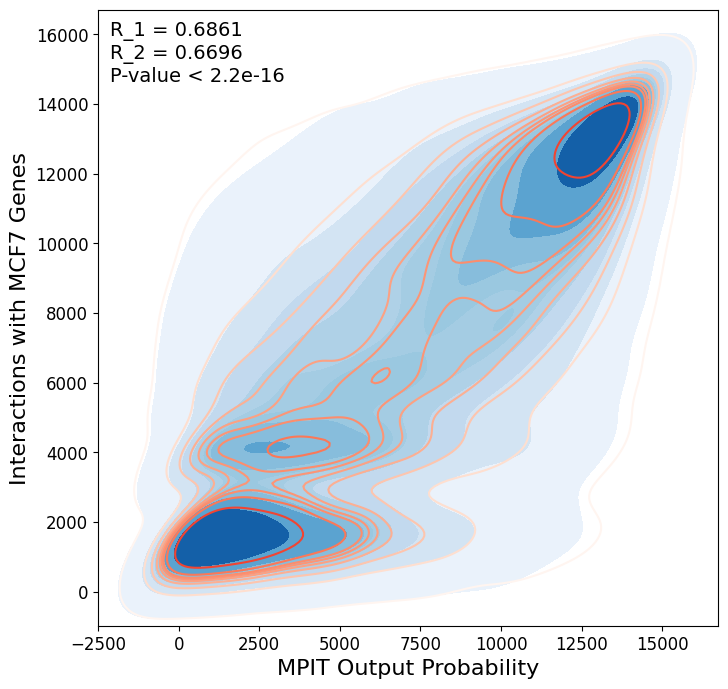

In [14]:
fig = plt.figure(figsize=(8, 8))
sns.kdeplot(x=pred_with_interactions_1.avg_score.rank(), y=pred_with_interactions_1.Cancer_Gene_Interactions.rank(), cmap='Blues',
            thresh=0.01, fill=True)
sns.kdeplot(x=pred_with_interactions_2.avg_score.rank(), y=pred_with_interactions_2.Cancer_Gene_Interactions.rank(), cmap='Reds',
            thresh=0.01, fill=False)

correlation_1, pvalue_1 = scipy.stats.spearmanr(pred_with_interactions_1.avg_score,
                                           pred_with_interactions_1.Cancer_Gene_Interactions
                                        )

correlation_2, pvalue_2 = scipy.stats.spearmanr(pred_with_interactions_2.avg_score,
                                           pred_with_interactions_2.Cancer_Gene_Interactions
                                        )
                                     
print(correlation_1, pvalue_1, correlation_2, pvalue_2)
plt.text(0.02, 0.98, fr'''R_1 = {correlation_1:.4f}
R_2 = {correlation_2:.4f}
P-value < {2.2e-16:.1e}''', transform=plt.gca().transAxes, fontsize=14, ha='left', va='top')
plt.xlabel('MPIT Output Probability', fontsize=16)
plt.ylabel(f'Interactions with {CELL_LINE} Genes', fontsize=16)
plt.gca().tick_params(axis='both', labelsize=12)
fig.savefig(f'data/Results/{CELL_LINE}_correlation_cginteractions.svg')

## GO TERM Analysis

In [1]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import utils
gp.__version__

'1.0.5'

In [2]:
DATA_DIR = "data/Breast_Cancer_Matrix"
# DATA_DIR = "data/Leukemia_Matrix"
# DATA_DIR = "data/Lung_Cancer_Matrix"
CELL_LINE = utils.get_cell_line(DATA_DIR)
KCGs = pd.read_csv(f'label_collect/{CELL_LINE}/positive/NCG.txt', header=None).iloc[:, 0].values

In [3]:
enr_k = gp.enrichr(gene_list=f'label_collect/{CELL_LINE}/positive/NCG.txt', # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2023','GO_Molecular_Function_2023','GO_Cellular_Component_2023'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [4]:
ax_k = gp.barplot(enr_k.results,
              column="Adjusted P-value",
              group='Gene_set', 
              title=f'Known {CELL_LINE} Genes',
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue', 'orange'], # set colors for group
              ofname=f'data/Results/enrichr_{CELL_LINE}_k.svg'
             )

In [3]:
preds_1 = pd.read_csv(f'data/Results/{CELL_LINE}_unknown_pred.csv')
preds_1 = preds_1.sort_values(by=['avg_score'], ascending=False)
print(preds_1.head(5))
preds_1 = preds_1.gene_name.tolist()[:100]
print(preds_1)

     gene_name  score_0  score_1  score_2   score_3  score_4  avg_score   
4771     UBE2I      1.0      1.0      1.0  1.000000      1.0        1.0  \
942       CCT3      1.0      1.0      1.0  1.000000      1.0        1.0   
8642     AURKA      1.0      1.0      1.0  1.000000      1.0        1.0   
2429      RELA      1.0      1.0      1.0  1.000000      1.0        1.0   
3274      CDK4      1.0      1.0      1.0  0.999999      1.0        1.0   

      pred_label  
4771           1  
942            1  
8642           1  
2429           1  
3274           1  
['UBE2I', 'CCT3', 'AURKA', 'RELA', 'CDK4', 'LMNA', 'RAD21', 'PSMC5', 'GSK3B', 'BLM', 'GRB7', 'XPO1', 'HSP90AA1', 'CCT2', 'CSNK1G2', 'MDM4', 'CCT4', 'YY1', 'PRKDC', 'DHX9', 'LYN', 'CREB1', 'CCT6A', 'RNF2', 'CDK5', 'CCT8', 'STK4', 'SMAD1', 'NCOA2', 'KAT2B', 'ASH2L', 'BTRC', 'KAT5', 'PABPC1', 'SKP2', 'HNRNPA1', 'PTK2', 'XRCC6', 'CARM1', 'ERBB4', 'RBL1', 'CDK9', 'TFAP2C', 'YWHAZ', 'WWP1', 'UCHL5', 'UBC', 'CCT5', 'PLEC', 'SHC1', 'CEBPB'

In [10]:

enr_u = gp.enrichr(gene_list=preds_1,
                 gene_sets=['GO_Biological_Process_2023','GO_Molecular_Function_2023','GO_Cellular_Component_2023'],
                 organism='human',
                 outdir=None, # don't write to disk
                )

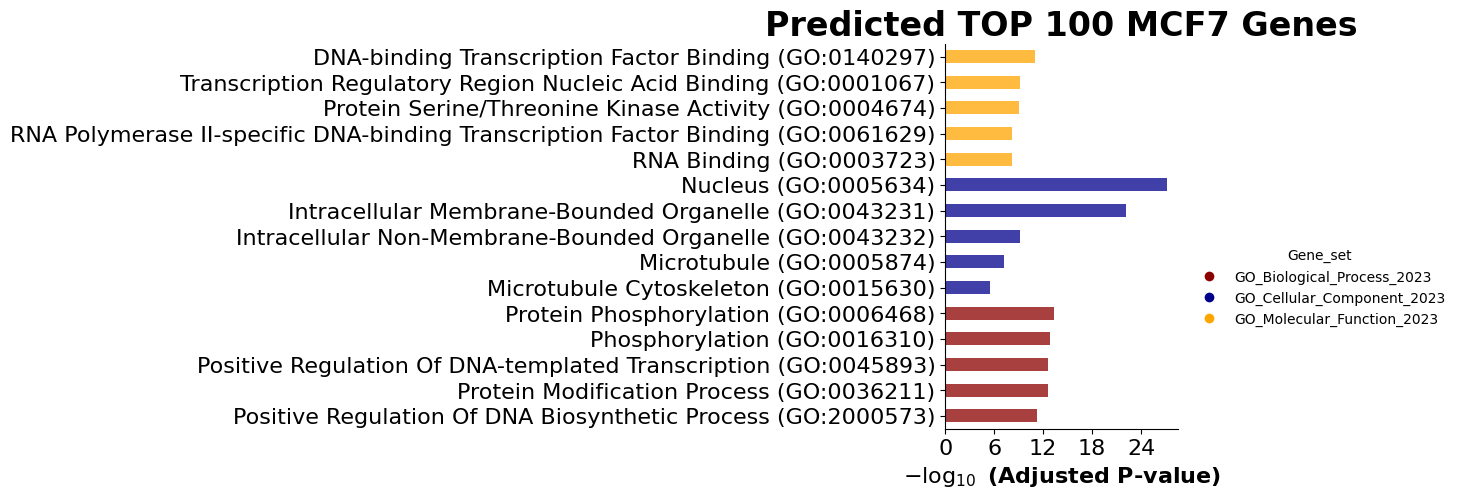

In [11]:
ax_u = gp.barplot(enr_u.results,
              column="Adjusted P-value",
              group='Gene_set',
              title=f'Predicted TOP 100 {CELL_LINE} Genes',
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue', 'orange'], # set colors for group
              ofname=None#f'data/Results/enrichr_{CELL_LINE}_u.svg'
             )
plt.show()